In [32]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

aspect_ratio = 16./9

e_Moon = 0.0549006 # wikipedia
a_Moon = 384748. # km - wikipedia
D_Moon = 1737*2.

eclipse_alpha_Moon = 30./60 + 15/60./60. # arcmin/sec to deg - from stellarium
eclipse_alpha_Sun = 32./60 + 4/60./60. # arcmin to deg - from stellarium

apo_Earth = 152.10e6 # apohelion distance for Earth in km
peri_Earth = 147.10e6 # perihelion distance for Earth in km
D_Sun = 2.*695700. # km

[Text(0.0, 0, ''),
 Text(0.7853981633974483, 0, ''),
 Text(1.5707963267948966, 0, ''),
 Text(2.356194490192345, 0, ''),
 Text(3.141592653589793, 0, ''),
 Text(3.9269908169872414, 0, ''),
 Text(4.71238898038469, 0, ''),
 Text(5.497787143782138, 0, '')]

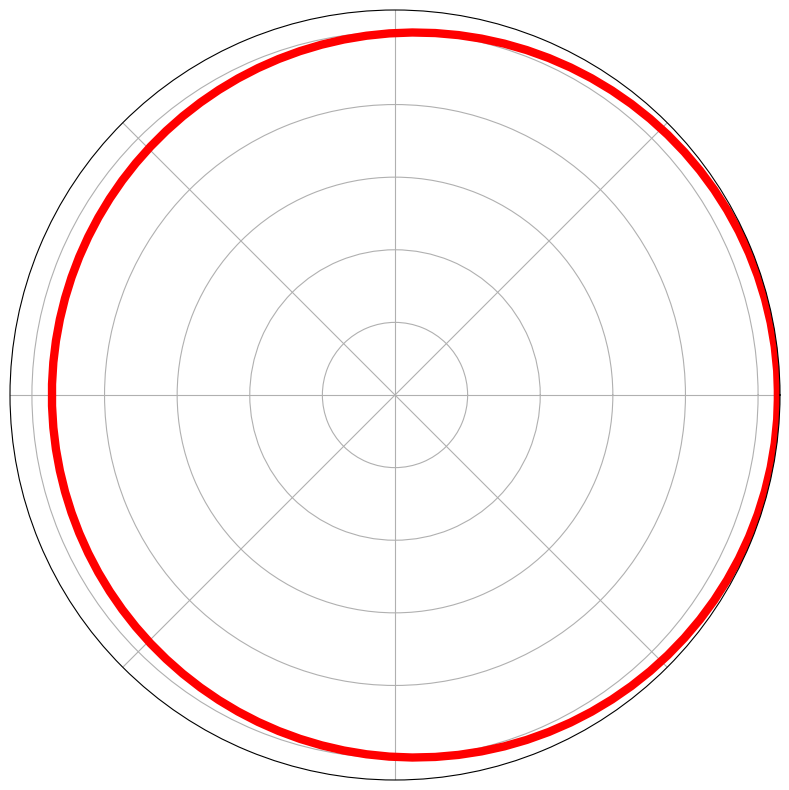

In [7]:
fig = plt.figure(figsize=(10*aspect_ratio, 10))
ax = fig.add_subplot(projection='polar')

theta = np.linspace(0., 2*np.pi, 100) # radians

r_Moon = (1. - e_Moon*e_Moon)/(1 - e_Moon*np.cos(theta))
ax.plot(theta, r_Moon, lw=6, color='red')

ax.set_yticklabels([])
ax.set_xticklabels([])

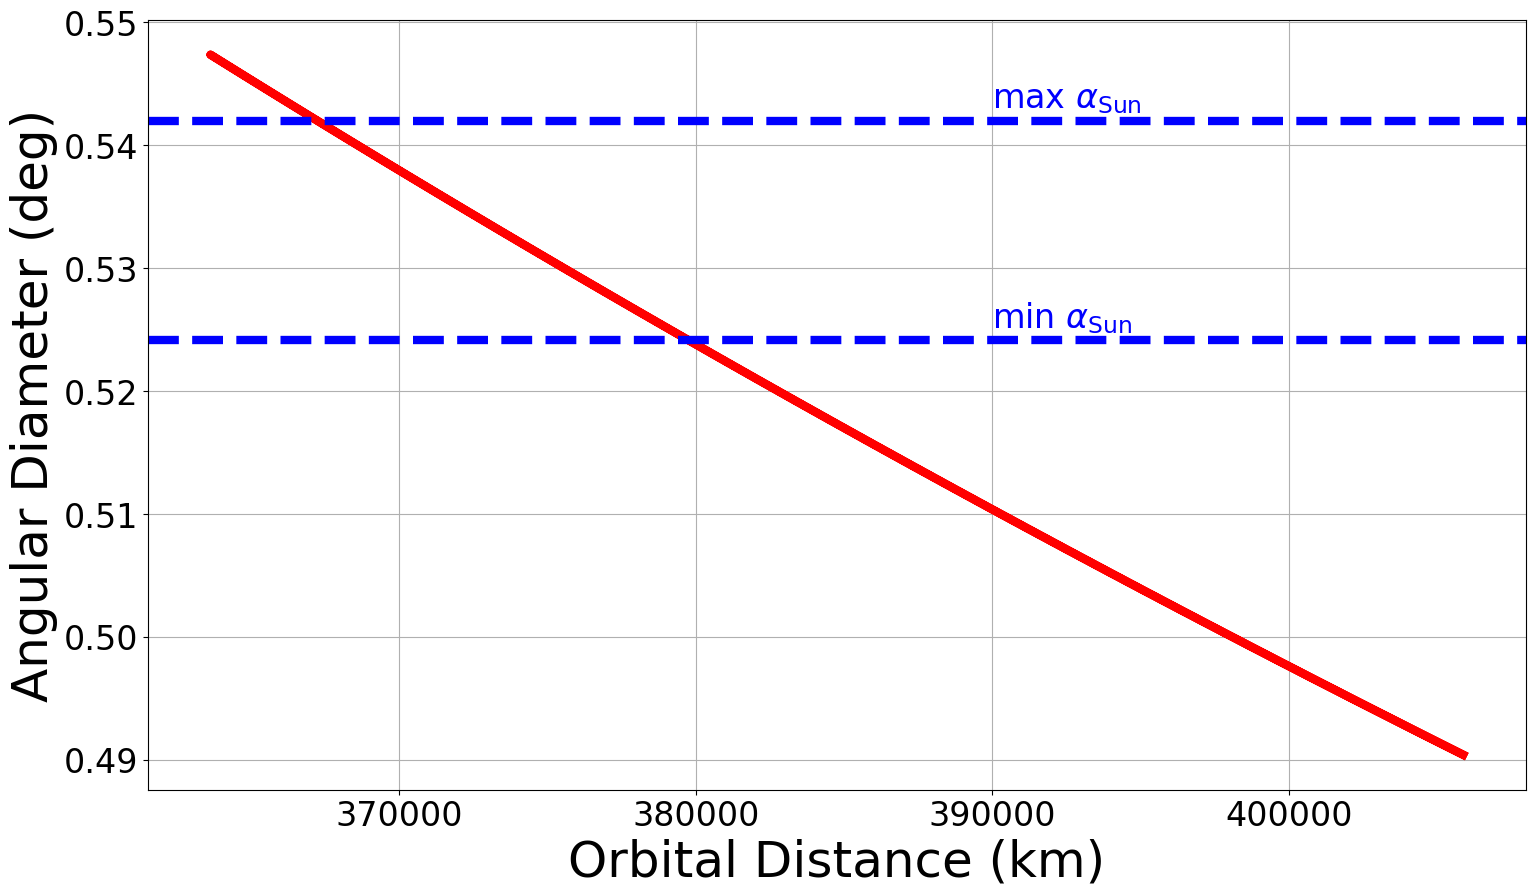

In [30]:
fig = plt.figure(figsize=(10*aspect_ratio, 10))
ax = fig.add_subplot()

theta = np.linspace(0., 2*np.pi, 100) # radians

r_Moon = a_Moon*(1. - e_Moon*e_Moon)/(1 - e_Moon*np.cos(theta))
alpha_Moon = D_Moon/r_Moon*180./np.pi # angular diameter in degrees

max_alpha_Sun = D_Sun/peri_Earth*180./np.pi
min_alpha_Sun = D_Sun/apo_Earth*180./np.pi

ax.plot(r_Moon, alpha_Moon, lw=6, color='red')
ax.axhline(min_alpha_Sun, color='blue', lw=6, ls='--')
ax.axhline(max_alpha_Sun, color='blue', lw=6, ls='--')
ax.text(390000, max_alpha_Sun*1.002, r'max $\alpha_{\rm Sun}$', fontsize=24, color='blue')
ax.text(390000, min_alpha_Sun*1.002, r'min $\alpha_{\rm Sun}$', fontsize=24, color='blue')

ax.tick_params(labelsize=24)
ax.set_xlabel("Orbital Distance (km)", fontsize=36)
ax.set_ylabel("Angular Diameter (deg)", fontsize=36)
ax.grid(True)

fig.savefig("../figures/Moon_Angular_Diameter.png", dpi=300, bbox_inches="tight")

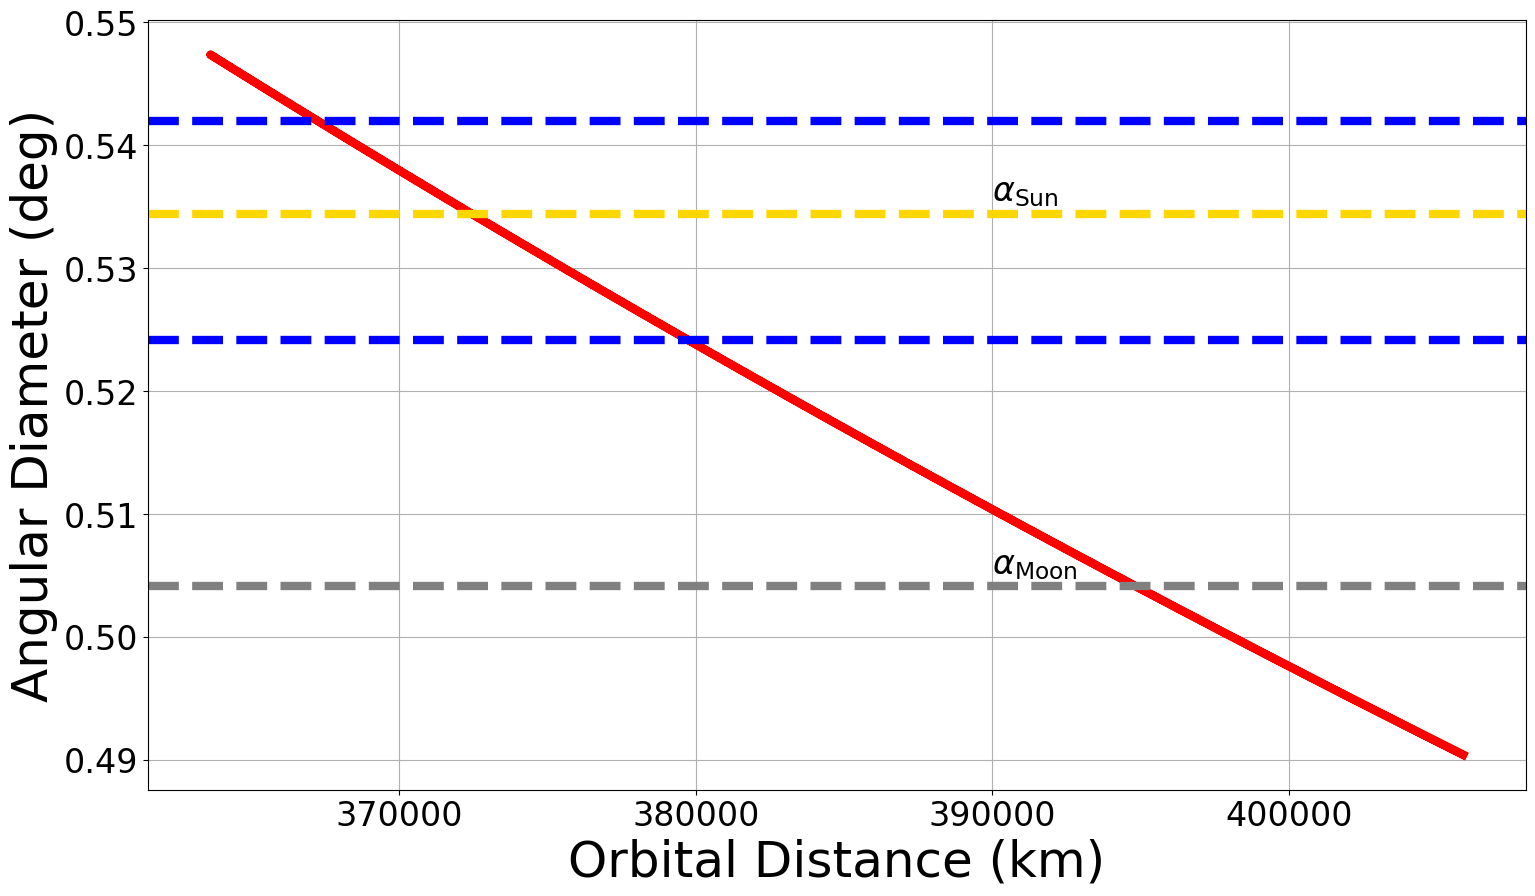

In [41]:
fig = plt.figure(figsize=(10*aspect_ratio, 10))
ax = fig.add_subplot()

theta = np.linspace(0., 2*np.pi, 100) # radians

r_Moon = a_Moon*(1. - e_Moon*e_Moon)/(1 - e_Moon*np.cos(theta))
alpha_Moon = D_Moon/r_Moon*180./np.pi # angular diameter in degrees

max_alpha_Sun = D_Sun/peri_Earth*180./np.pi
min_alpha_Sun = D_Sun/apo_Earth*180./np.pi

ax.plot(r_Moon, alpha_Moon, lw=6, color='red')
ax.axhline(min_alpha_Sun, color='blue', lw=6, ls='--')
ax.axhline(max_alpha_Sun, color='blue', lw=6, ls='--')
ax.axhline(eclipse_alpha_Moon, color='grey', lw=6, ls='--')
ax.axhline(eclipse_alpha_Sun, color='gold', lw=6, ls='--')
ax.text(390000, eclipse_alpha_Moon*1.002, r'$\alpha_{\rm Moon}$', fontsize=24, color='k')
ax.text(390000, eclipse_alpha_Sun*1.002, r'$\alpha_{\rm Sun}$', fontsize=24, color='k')

ax.tick_params(labelsize=24)
ax.set_xlabel("Orbital Distance (km)", fontsize=36)
ax.set_ylabel("Angular Diameter (deg)", fontsize=36)
ax.grid(True)

fig.savefig("../figures/Moon_Angular_Diameter_eclipse-diams.png", dpi=300, bbox_inches="tight")

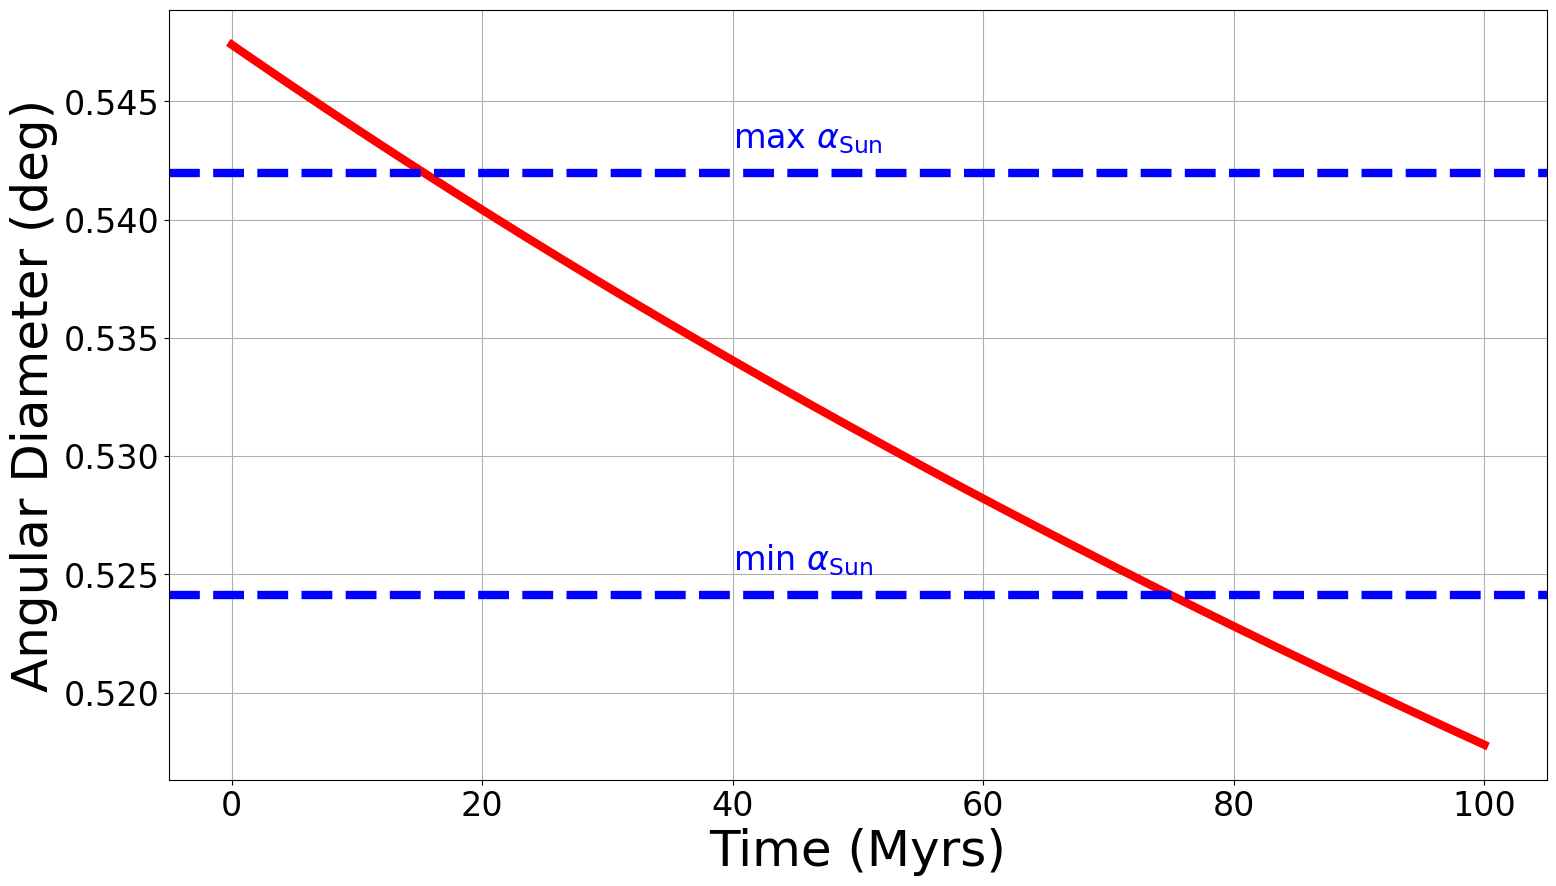

In [85]:
def evolution_of_a(t, a_init=a_Moon*1e3*(1. - e_Moon), MEarth=6e24, REarth=6400e3, QEarth=12., MMoon=7e22):
    G = 6.67e-11 # MKS
    
    return (a_init**(13./2) + 117./4*np.sqrt(G/MEarth)*MMoon*REarth**5/QEarth*t)**(2./13)

min_alpha_Sun = D_Sun/apo_Earth*180./np.pi

t = np.linspace(0., 1e8*3.14e7, 10000)
a_evol = evolution_of_a(t)

alpha_Moon_evol = D_Moon*1e3/a_evol*180./np.pi

fig = plt.figure(figsize=(10*aspect_ratio, 10))
ax = fig.add_subplot()
ax.tick_params(labelsize=24)
ax.set_xlabel("Time (Myrs)", fontsize=36)
ax.set_ylabel("Angular Diameter (deg)", fontsize=36)
ax.grid(True)

ax.plot(t/3.14e7/1e6, alpha_Moon_evol, lw=6, color='red')
ax.axhline(min_alpha_Sun, color='blue', lw=6, ls='--')
ax.axhline(max_alpha_Sun, color='blue', lw=6, ls='--')

ax.text(40, max_alpha_Sun*1.002, r'max $\alpha_{\rm Sun}$', fontsize=24, color='blue')
ax.text(40, min_alpha_Sun*1.002, r'min $\alpha_{\rm Sun}$', fontsize=24, color='blue')

fig.savefig("../figures/Approx_Evolution_Lunar_Angular_Diameter.png", dpi=300, bbox_inches="tight")